In [20]:
from copy import copy, deepcopy
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor  
import random

import sklearn.linear_model
import pandas as pd 
import numpy as np
import sys
import re

%matplotlib inline

In [21]:
# Load the Wine Dataset
df_wine = pd.read_csv("../df_wine.csv", encoding = 'utf8', index_col=0)

In [22]:
df_wine.head(1)

,price,title,points,year_of_wine,v_Abouriou,v_Aglianico,v_Airen,v_Albana,v_Albanello,v_Albariño,...,province_Spanish Islands,province_Tasmania,province_Texas,province_Tuscany,province_Veneto,province_Vermont,province_Victoria,province_Virginia,province_Washington,province_Western Australia
0,14.0,Rainstorm 2013 Pinot Gris (Willamette Valley),87,2013,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Preparition

In [23]:
# DEFINE X and Y VARIABLES
# df_wine = df_wine[df_wine['year_of_wine'] > 0]
# df_X = df_wine.drop('points', axis=1)
# df_X = df_X.drop('title', axis=1) # year was already extracted
# df_Y = df_wine[['points']]

In [24]:
df_wine = df_wine[df_wine['year_of_wine'] > 0]
df_X = df_wine[['year_of_wine']]
df_Y = df_wine[['points']]

# Test & Train Split

In [25]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.3, random_state=0) 

# HPO with ground truth

In [26]:
# # Using Randomized Search instead of a grid search

# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from scipy.stats import randint as sp_randint
# regressor3 = DecisionTreeRegressor()
# param_dist = {'max_depth': sp_randint(2,16),
#               'min_samples_split': sp_randint(2,16)}

# n_iter_search = 20
# clfrs = RandomizedSearchCV(regressor3, 
#                                    param_distributions=param_dist,
#                                    scoring='neg_mean_squared_error',
#                                    cv=5 , n_jobs=1, verbose=1,
#                                    n_iter=n_iter_search)
# clfrs.fit(df_X, df_Y)
# clfrs.best_params_, clfrs.best_score_

# LR

In [27]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lm = linear_model.LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = lm.predict(X_test)

# The mean squared error
print("# Best result WITH hyperparameter optimisation #")
print("Root Mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Best result WITH hyperparameter optimisation #
Root Mean squared error: 3.07


# Introduce Errors in Training

In [28]:
# Ground truth for other calculations
X_train_gt = X_train.copy()

In [29]:
X_train[['year_of_wine']].describe()

,year_of_wine
count,68389.000000
mean,2010.658205
std,3.598446
min,1945.000000
25%,2009.000000
50%,2011.000000
75%,2013.000000
max,2017.000000


In [30]:
year = X_train[['year_of_wine']].copy()
year.columns = ['new_year']
# df_wine = pd.concat([year, df_wine], axis=1)
# df_wine

In [31]:
def introduce_outliers(df):
    rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
    # minimum sayi 1940 %0.5 e kadar artabilir
    # max sayi 2018 %0.5 e kadar artabilir
    j = 0
    year_val = 0
    for i, row in df.iterrows():
        if j%2 == 0:
            year_val = row['year_of_wine'] * random.choice(rates) 
            df.at[i,'year_of_wine'] = year_val
        j = j + 1
    return df

In [32]:
X_train = introduce_outliers(X_train)

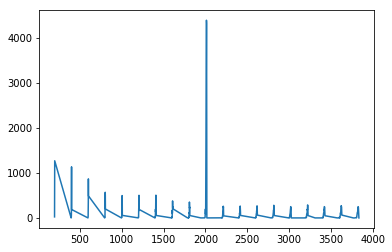

In [33]:
plt.plot(X_train.groupby(['year_of_wine']).size())

In [34]:
X_train[['year_of_wine']].describe()

,year_of_wine
count,68389.000000
mean,2010.886385
std,798.660250
min,199.000000
25%,1814.000000
50%,2011.000000
75%,2016.000000
max,3832.000000


# HPO with Errors in Training

In [35]:
# # Using Randomized Search instead of a grid search

# # combine training and testing
# x_data = pd.concat([X_train, X_test], axis=0)
# y_data = pd.concat([y_train, y_test], axis=0)

# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from scipy.stats import randint as sp_randint
# regressor3 = DecisionTreeRegressor()
# param_dist = {'max_depth': sp_randint(2,16),
#               'min_samples_split': sp_randint(2,16)}

# n_iter_search = 20
# clfrs = RandomizedSearchCV(regressor3, 
#                                    param_distributions=param_dist,
#                                    scoring='neg_mean_squared_error',
#                                    cv=5 , n_jobs=1, verbose=1,
#                                    n_iter=n_iter_search)
# clfrs.fit(x_data, y_data)
# clfrs.best_params_, clfrs.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished


({'max_depth': 10, 'min_samples_split': 6}, -9.28234565722323)

# LR with Outliers in Training

In [36]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lm = linear_model.LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = lm.predict(X_test)

# The mean squared error
print("# Best result WITH hyperparameter optimisation #")
print("Root Mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Best result WITH hyperparameter optimisation #
Root Mean squared error: 3.07


# Outlier Detection

In [38]:
mean = np.mean(X_train[['year_of_wine']], axis=0)
sd = np.std(X_train[['year_of_wine']], axis=0)

In [39]:
def outlier_detection(data):
    mean = np.mean(data, axis=0)
    sd = np.std(data, axis=0)
    final_list = [x for x in data if (x > mean - 1 * sd)]
    final_list = [x for x in final_list if (x < mean + 1 * sd)]
    return final_list, mean

In [40]:
year_outliers = outlier_detection(X_train['year_of_wine'].values)[0]
mean = outlier_detection(X_train['year_of_wine'].values)[1]

In [41]:
min_year = min(year_outliers)
max_year = max(year_outliers)

training_data = pd.concat([X_train, y_train], axis=1)

# DROP
# training_cleaned = training_data.drop(training_data[training_data.year_of_wine < min_year].index)
# training_cleaned = training_cleaned.drop(training_cleaned[training_cleaned.year_of_wine > max_year].index)
# X_train_outlier_cleaned = training_cleaned[training_cleaned.columns[:-1].tolist()]
# y_train_outlier_cleaned = training_cleaned.filter(['points'], axis=1)

# MEAN
training_data.loc[training_data['year_of_wine'] < min_year, 'year_of_wine'] = round(mean)
training_data.loc[training_data['year_of_wine'] > max_year, 'year_of_wine'] = round(mean)
X_train_outlier_cleaned = training_data[training_data.columns[:-1].tolist()]
y_train_outlier_cleaned = training_data.filter(['points'], axis=1)

# PRECISION & RECALL & RMSE FOR ERRORS

In [42]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(X_train_gt['year_of_wine'].values, X_train_outlier_cleaned['year_of_wine'].values, average='weighted')

/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(0.9234914869617762, 0.5324101829241544, 0.6349069964323726, None)

In [43]:
# RMSE for Cleaned data and GT
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(X_train_gt['year_of_wine'].values, X_train_outlier_cleaned['year_of_wine'].values))) 

Root Mean Squared Error: 186.88007126140903


In [44]:
# RMSE for Dirty data and GY
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(X_train_gt['year_of_wine'].values, X_train['year_of_wine'].values))) 

Root Mean Squared Error: 798.6740704923976


# HPO optimisation with Clened Data

In [137]:
# # Using Randomized Search instead of a grid search

# # combine training and testing
# x_data = pd.concat([X_train_outlier_cleaned, X_test], axis=0)
# y_data = pd.concat([y_train_outlier_cleaned, y_test], axis=0)

# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from scipy.stats import randint as sp_randint
# regressor3 = DecisionTreeRegressor()
# param_dist = {'max_depth': sp_randint(2,16),
#               'min_samples_split': sp_randint(2,16)}

# n_iter_search = 20
# clfrs = RandomizedSearchCV(regressor3, 
#                                    param_distributions=param_dist,
#                                    scoring='neg_mean_squared_error',
#                                    cv=5 , n_jobs=1, verbose=1,
#                                    n_iter=n_iter_search)
# clfrs.fit(x_data, y_data)
# clfrs.best_params_, clfrs.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished


({'max_depth': 9, 'min_samples_split': 3}, -9.285710132465157)

# LR with Cleaned Data

In [45]:
# Best result with Hyperparameter optimisation
regressor = DecisionTreeRegressor(max_depth = clfrs.best_params_['max_depth'], min_samples_split = clfrs.best_params_['min_samples_split'])  

# Train the model using the training sets
regressor.fit(X_train_outlier_cleaned, y_train_outlier_cleaned)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

# The evaluation metrics
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 2.4844486915642254
Mean Squared Error: 9.316350973112675
Root Mean Squared Error: 3.0522698067360747
